In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
from collections import Counter, defaultdict
sns.set_context("notebook")
sns.set_style("white")
%matplotlib inline

In [7]:
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [88]:
df_task = pd.read_pickle("df_task.pkl")

In [89]:
df_task

,userid,task_id,topic,task_pos,condition,satisfaction,sat_zscore,quality,num_low_news_imp,num_high_news_clk,...,sum_pre_prefs,max_pre_prefs,min_pre_prefs,mean_read_prefs,sum_read_prefs,max_read_prefs,min_read_prefs,last_pre_prefs,last_read_prefs,last_post_prefs
0,2014010219,7,mixed,0,c0,5,0.559322,5,0,6,...,20.0,5.0,2.0,3.666667,22.0,4.0,3.0,3.0,4.0,3
1,2014010219,10,体育,1,c6,3,-1.491525,3,6,3,...,23.0,4.0,3.0,3.285714,23.0,4.0,3.0,4.0,4.0,4
2,2014010219,1,社会,2,c0,5,0.559322,5,0,8,...,26.0,4.0,3.0,3.714286,26.0,5.0,2.0,4.0,5.0,5
3,2014010219,6,mixed,3,c6,4,-0.466102,4,6,6,...,35.0,5.0,3.0,3.444444,31.0,4.0,3.0,4.0,3.0,3
4,2014010219,9,mixed,4,c9,4,-0.466102,4,9,3,...,29.0,4.0,3.0,3.250000,26.0,4.0,2.0,4.0,4.0,3
5,2014010219,3,科技,5,c0,4,-0.466102,4,0,10,...,38.0,5.0,3.0,3.500000,35.0,4.0,3.0,3.0,3.0,3
6,2014010219,2,娱乐,6,c0,5,0.559322,5,0,5,...,14.0,4.0,3.0,3.750000,15.0,5.0,3.0,4.0,4.0,3
7,2014010219,4,体育,7,c0,4,-0.466102,4,0,7,...,22.0,5.0,3.0,4.166667,25.0,5.0,4.0,5.0,5.0,3
8,2014010219,11,社会,8,c6,3,-1.491525,3,6,9,...,34.0,4.0,3.0,3.400000,34.0,4.0,3.0,3.0,3.0,2
9,2014010219,5,历史,9,c0,6,1.584746,6,0,6,...,20.0,4.0,4.0,4.200000,21.0,5.0,4.0,4.0,4.0,5


In [90]:
df_task[df_task['userid'] == "2014010219"][['pre_prefs', 'mean_pre_prefs', 'read_prefs', 'mean_read_prefs', 'satisfaction']]

,pre_prefs,mean_pre_prefs,read_prefs,mean_read_prefs,satisfaction
0,"[2, 3, 2, 5, 5, 3]",3.333333,"[3, 3, 4, 4, 4, 4]",3.666667,5
1,"[3, 3, 3, 3, 4, 3, 4]",3.285714,"[3, 4, 3, 3, 3, 3, 4]",3.285714,3
2,"[3, 4, 4, 4, 3, 4, 4]",3.714286,"[2, 4, 4, 4, 3, 4, 5]",3.714286,5
3,"[4, 4, 4, 3, 5, 4, 4, 3, 4]",3.888889,"[4, 3, 4, 3, 4, 3, 3, 4, 3]",3.444444,4
4,"[3, 4, 3, 4, 4, 3, 4, 4]",3.625000,"[3, 3, 2, 3, 4, 3, 4, 4]",3.250000,4
5,"[4, 4, 4, 3, 4, 4, 5, 4, 3, 3]",3.800000,"[4, 3, 3, 3, 4, 4, 4, 4, 3, 3]",3.500000,4
6,"[3, 3, 4, 4]",3.500000,"[3, 3, 5, 4]",3.750000,5
7,"[4, 3, 3, 4, 3, 5]",3.666667,"[4, 4, 4, 4, 4, 5]",4.166667,4
8,"[3, 3, 4, 4, 4, 3, 4, 3, 3, 3]",3.400000,"[3, 4, 4, 3, 4, 3, 4, 3, 3, 3]",3.400000,3
9,"[4, 4, 4, 4, 4]",4.000000,"[4, 5, 4, 4, 4]",4.200000,6


In [91]:
df_task = df_task.dropna()

In [92]:
for userid, tdf in df_task.groupby("userid"):
    print userid,
    print pearsonr(tdf['mean_pre_prefs'], tdf['sat_zscore'])[0],
    print pearsonr(tdf['mean_read_prefs'], tdf['sat_zscore'])[0],
    print pearsonr(tdf['mean_post_prefs'], tdf['sat_zscore'])[0]

2014010219 0.65149444861 0.748813088782 0.475429835814
2014010628 0.508043684096 0.423169127082 0.717893588053
2014010632 0.480398997571 0.434952122907 0.393620835103
2014011366 0.696806435544 0.443848431624 0.165294364219
2014011453 0.631956260606 0.469311973029 0.508529169642
2014211222 0.50159488901 0.0910789384395 0.756106831269
2014211325 0.600367515548 0.442461008154 0.830413560191
2014310617 0.132513859657 -0.17939401589 -0.0408413826521
2015010105 0.502823482856 0.706605630531 0.589876574545
2016012979 0.441789086671 0.450521634464 0.277794136978
2016211383 0.642454538525 0.228142018243 0.694917418704
2017010394 0.378285008309 0.565967037887 0.900015571338
2017010424 0.386583018165 0.288605184804 0.582821749551
2017011482 0.620559096881 0.421765836753 0.701473283903
2017011739 0.522964888593 0.577368988876 0.669078441984
201711080228 0.766839454531 0.599864401563 0.739898810959
2017210738 0.612675619904 0.570972716728 0.786201214873
2017213550 0.910109425558 0.387617645703 0.71

In [93]:
df_task

,userid,task_id,topic,task_pos,condition,satisfaction,sat_zscore,quality,num_low_news_imp,num_high_news_clk,...,sum_pre_prefs,max_pre_prefs,min_pre_prefs,mean_read_prefs,sum_read_prefs,max_read_prefs,min_read_prefs,last_pre_prefs,last_read_prefs,last_post_prefs
0,2014010219,7,mixed,0,c0,5,0.559322,5,0,6,...,20.0,5.0,2.0,3.666667,22.0,4.0,3.0,3.0,4.0,3
1,2014010219,10,体育,1,c6,3,-1.491525,3,6,3,...,23.0,4.0,3.0,3.285714,23.0,4.0,3.0,4.0,4.0,4
2,2014010219,1,社会,2,c0,5,0.559322,5,0,8,...,26.0,4.0,3.0,3.714286,26.0,5.0,2.0,4.0,5.0,5
3,2014010219,6,mixed,3,c6,4,-0.466102,4,6,6,...,35.0,5.0,3.0,3.444444,31.0,4.0,3.0,4.0,3.0,3
4,2014010219,9,mixed,4,c9,4,-0.466102,4,9,3,...,29.0,4.0,3.0,3.250000,26.0,4.0,2.0,4.0,4.0,3
5,2014010219,3,科技,5,c0,4,-0.466102,4,0,10,...,38.0,5.0,3.0,3.500000,35.0,4.0,3.0,3.0,3.0,3
6,2014010219,2,娱乐,6,c0,5,0.559322,5,0,5,...,14.0,4.0,3.0,3.750000,15.0,5.0,3.0,4.0,4.0,3
7,2014010219,4,体育,7,c0,4,-0.466102,4,0,7,...,22.0,5.0,3.0,4.166667,25.0,5.0,4.0,5.0,5.0,3
8,2014010219,11,社会,8,c6,3,-1.491525,3,6,9,...,34.0,4.0,3.0,3.400000,34.0,4.0,3.0,3.0,3.0,2
9,2014010219,5,历史,9,c0,6,1.584746,6,0,6,...,20.0,4.0,4.0,4.200000,21.0,5.0,4.0,4.0,4.0,5


In [101]:
df_task[(df_task['topic'] == "mixed") & (df_task['condition'] == "c9")].corr()[calculate_pvalues(df_task) < 0.05].loc[['mean_pre_prefs', 'mean_read_prefs', 'mean_post_prefs'], ['satisfaction', 'sat_zscore']]

,satisfaction,sat_zscore
mean_pre_prefs,0.368685,0.307414
mean_read_prefs,0.626843,0.423998
mean_post_prefs,0.539479,0.162856


In [103]:
df_task[(df_task['topic'] != "mixed") & (df_task['condition'] == "c0")].corr()[calculate_pvalues(df_task) < 0.05].loc[['mean_pre_prefs', 'mean_read_prefs', 'mean_post_prefs'], ['satisfaction', 'sat_zscore']]

,satisfaction,sat_zscore
mean_pre_prefs,0.486027,0.433088
mean_read_prefs,0.446454,0.282728
mean_post_prefs,0.498155,0.308084


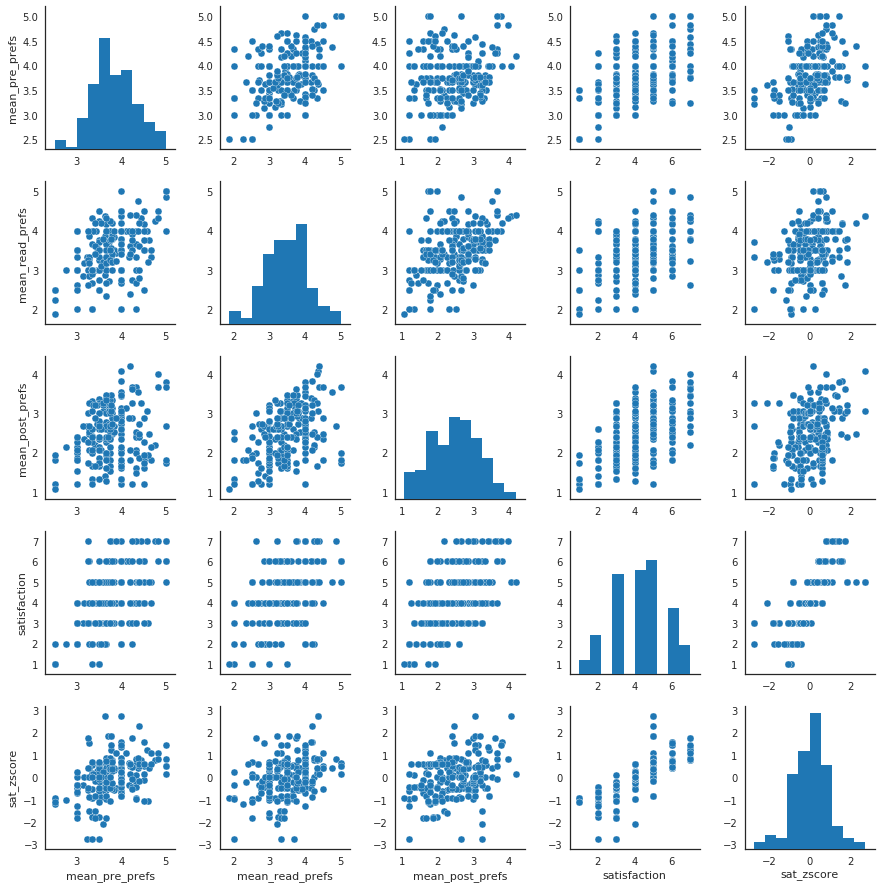

In [95]:
sns.pairplot(df_task[['mean_pre_prefs', 'mean_read_prefs', 'mean_post_prefs', 'satisfaction', 'sat_zscore']])

In [28]:
df_task[['mean_pre_prefs', 'mean_read_prefs', 'mean_post_prefs', 'satisfaction', 'sat_zscore']].

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
mean_pre_prefs     194 non-null float64
mean_read_prefs    194 non-null float64
mean_post_prefs    198 non-null float64
satisfaction       198 non-null int64
sat_zscore         198 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.8 KB
